In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# Open a simple image from Image folder
image = cv2.imread("test_image_folder/test/test_image.png")

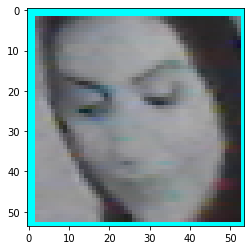

In [10]:
# demonstrate the original pic
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)
plt.show()

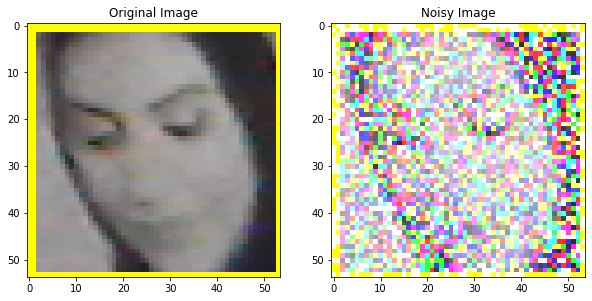

In [11]:
# Add Gaussian noise
mean = 0
std_dev = 25
noise = np.random.normal(mean, std_dev, image.shape).astype('uint8')
noisy_image = cv2.add(image, noise)

# Display the original and noisy images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')

plt.show()

In [18]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Encoder
        self.enc_conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.enc_conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Bottleneck
        self.bottleneck_conv1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bottleneck_conv2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        # Decoder
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec_conv1 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.dec_conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.final_conv = nn.Conv2d(64, 3, kernel_size=3, padding=1)

    def forward(self, x):
        # Encoder
        x1 = torch.relu(self.enc_conv1(x))
        x2 = torch.relu(self.enc_conv2(x1))
        x_pool = self.pool(x2)

        # Bottleneck
        x_bottleneck = torch.relu(self.bottleneck_conv1(x_pool))
        x_bottleneck = torch.relu(self.bottleneck_conv2(x_bottleneck))

        # Decoder
        x_upconv = self.upconv1(x_bottleneck)
        x_concat = torch.cat([x_upconv, x2], dim=1)
        x_dec1 = torch.relu(self.dec_conv1(x_concat))
        x_dec2 = torch.relu(self.dec_conv2(x_dec1))

        # Output
        x_final = torch.tanh(self.final_conv(x_dec2))
        denoised_image = x_final + x

        return denoised_image


model = UNet()
noisy_image_tensor = torch.Tensor(noisy_image).permute(2, 0, 1).unsqueeze(0)
denoised_image_tensor = model(noisy_image_tensor)
denoised_image = denoised_image_tensor.squeeze().permute(1, 2, 0).detach().numpy()

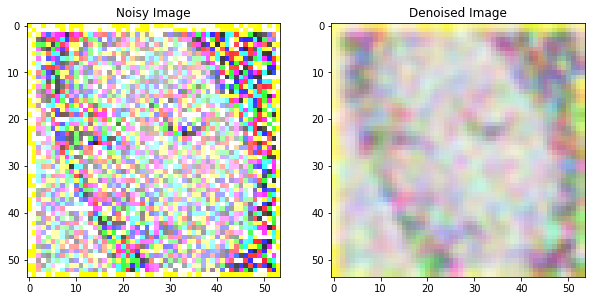

In [19]:
# Apply Gaussian blur to remove noise
denoised_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Display the noisy and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image)
plt.title('Noisy Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title('Denoised Image')

plt.show()
